In [1]:
import numpy as np
import random 
import matplotlib.pyplot as plt
import scipy.special as sps
import pandas as pd
import itertools
import os

# gamma distribution

In [2]:
shape, scale = 2., 1.5  # mean=4, std=2*sqrt(2)
s = np.random.gamma(shape, scale, 1000)

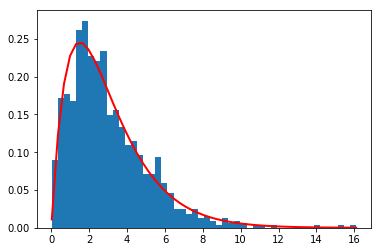

In [3]:
count, bins, ignored = plt.hist(s, 50, normed=True) #density=True
y = bins**(shape-1)*(np.exp(-bins/scale) /
                     (sps.gamma(shape)*scale**shape))
plt.plot(bins, y, linewidth=2, color='r')
plt.show()

In [46]:
fixation = random.sample(s, 40)
fixation = np.random.choice(s, size=[5,2,40], replace=True)

In [47]:
fixation[0][0] + 0.5


array([  2.09887096,   2.46248702,   1.29990597,   1.84283019,
         3.96664182,   2.92561149,   5.4390683 ,   2.53030177,
         4.05588612,   1.83291998,   2.92561149,   6.86278427,
         1.39550387,   5.45555544,   1.99061266,   0.79450203,
         3.88778038,   4.03753081,   2.97549309,   1.5737869 ,
         4.75753251,   2.18704481,   4.53405991,   2.75077931,
         4.32461812,   3.1736101 ,   2.17410267,   7.49258496,
         2.71104135,   2.62232838,   0.68484593,   2.91873003,
         7.75285467,   7.02808234,   3.77970447,  14.60960164,
         3.58155423,   2.20941481,   2.61884833,   3.14283882])

In [50]:
# grab fixation[0][0]
new_fixation = np.zeros((5,2,40))
for cond in range(5):
    for rep in range(2):
        if sum(fixation[cond][rep]) < 110:
            diff = 110 - sum(fixation[cond][rep])
            new_fixation[cond][rep] =  fixation[cond][rep] + diff/40
        elif sum(fixation[cond][rep]) > 110:
            diff = sum(fixation[cond][rep]) - 110
            new_fixation[cond][rep] = fixation[cond][rep] - diff/40

In [52]:
new_fixation

array([[[  1.21367441,   1.57729047,   0.41470942,   0.95763364,
           3.08144527,   2.04041494,   4.55387175,   1.64510522,
           3.17068957,   0.94772343,   2.04041494,   5.97758773,
           0.51030732,   4.57035889,   1.10541611,  -0.09069452,
           3.00258384,   3.15233426,   2.09029655,   0.68859035,
           3.87233596,   1.30184826,   3.64886336,   1.86558276,
           3.43942158,   2.28841355,   1.28890612,   6.60738841,
           1.8258448 ,   1.73713183,  -0.20035062,   2.03353348,
           6.86765812,   6.1428858 ,   2.89450792,  13.72440509,
           2.69635768,   1.32421826,   1.73365178,   2.25764227],
        [  4.37087642,   3.83609432,   3.26648018,   0.60117415,
           3.59881587,  -0.27451533,   5.08554497,   1.79803691,
          -0.1686984 ,   2.09627134,   2.54073905,   0.86174008,
           8.653806  ,   3.48088409,   4.4960391 ,   5.68731514,
           2.4265595 ,   4.84121297,   0.71414661,   1.0367644 ,
           4.82050397,  

In [53]:
# save fixation
# '/Users/h/Dropbox/Projects/SI.01/coding/'
np.save('/Users/h/Dropbox/Projects/SI.01/coding/fixation_gamma_40t_5cond_2rep', new_fixation)

In [54]:
new_fixation[0][1]

array([  4.37087642,   3.83609432,   3.26648018,   0.60117415,
         3.59881587,  -0.27451533,   5.08554497,   1.79803691,
        -0.1686984 ,   2.09627134,   2.54073905,   0.86174008,
         8.653806  ,   3.48088409,   4.4960391 ,   5.68731514,
         2.4265595 ,   4.84121297,   0.71414661,   1.0367644 ,
         4.82050397,   0.92053008,   3.59325217,   0.60117415,
         0.75190815,  -0.18775183,   4.17305457,   0.68420705,
         2.60404962,   1.09642575,  11.0127144 ,   5.95292337,
         3.84939389,   1.79175914,   0.30542832,   0.90980346,
         1.52659325,   0.47853844,   1.88017525,   4.28602941])

In [55]:
print sum(new_fixation[0][0])
print sum(new_fixation[0][1])
print sum(new_fixation[1][0])
print sum(new_fixation[1][1])
print sum(new_fixation[2][0])
print sum(new_fixation[2][1])
print sum(new_fixation[3][0])
print sum(new_fixation[3][1])
print sum(new_fixation[4][0])
print sum(new_fixation[4][1])

110.0
110.0
110.0
110.0
110.0
110.0
110.0
110.0
110.0
110.0


In [9]:
sum(sum(sum(fixation)))

1096.4414349781709

In [6]:
fixation[4][1]

array([ 3.86437196,  3.55938032,  4.58377201,  7.50301518,  1.21527746,
        3.49714784,  1.34939569,  0.36790182,  4.61083597,  1.58568212,
        1.86646658,  1.85132034,  0.81960609,  0.93815977,  4.09900645,
        0.93977922,  0.94771196,  3.61900354,  4.96821731,  4.03647391,
        6.87383819,  3.09720819,  4.2074603 ,  1.65815653,  4.28483404,
        4.70243549,  0.28276657,  5.8676033 ,  3.90322238,  0.54406434])

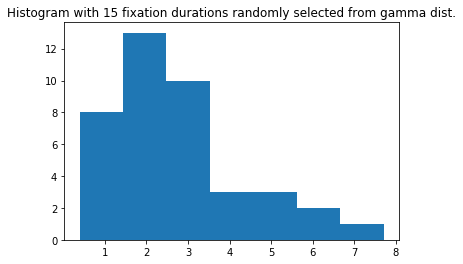

In [56]:
plt.hist(new_fixation[4][1], bins='auto')  
plt.title("Histogram with 15 fixation durations randomly selected from gamma dist.")
plt.show()

# create pandas dataframe

In [57]:
condition_1 = pd.DataFrame()
condition_1['fixation'] = new_fixation[4][1]
condition_1['cue'] = 0.2
condition_1['target'] = 2.5
condition_1['cue_onset'] = np.nan
condition_1['target_onset'] =np.nan
condition_1['fixation_onset'] =np.nan

In [58]:
condition_1

,fixation,cue,target,cue_onset,target_onset,fixation_onset
0,5.853615,0.2,2.5,NaN,NaN,NaN
1,1.108301,0.2,2.5,NaN,NaN,NaN
2,2.169371,0.2,2.5,NaN,NaN,NaN
3,1.601556,0.2,2.5,NaN,NaN,NaN
4,2.288843,0.2,2.5,NaN,NaN,NaN
5,3.502024,0.2,2.5,NaN,NaN,NaN
6,2.301437,0.2,2.5,NaN,NaN,NaN
7,3.005940,0.2,2.5,NaN,NaN,NaN
8,1.125236,0.2,2.5,NaN,NaN,NaN
9,0.390901,0.2,2.5,NaN,NaN,NaN


---------- >8 --------------------------------------------------

---------- >8 --------------------------------------------------

# randomize conditions

In [59]:
trials = [np.repeat('con',24) , np.repeat('incon',6) , np.repeat('neu',10)]

In [60]:
C = list(itertools.repeat('con', 24))
I = list(itertools.repeat('incon', 6))
N = list(itertools.repeat('neu', 10))
trials = C + I + N

In [61]:
random.shuffle(trials)

In [62]:
random.shuffle(trials)
df = pd.DataFrame()
df['trial_type'] = trials

In [63]:
df

,trial_type
0,con
1,con
2,neu
3,neu
4,con
5,con
6,con
7,con
8,incon
9,incon


# create EV files

In [67]:
cue_onset_neu = pd.DataFrame()
cue_onset_con = pd.DataFrame()
cue_onset_incon = pd.DataFrame()
target_onset_neu = pd.DataFrame()
target_onset_con = pd.DataFrame()
target_onset_incon = pd.DataFrame()
# for index in range(1,11):
index = 1   
sheetname = 'c' + str(index)
# load xlsx
df = pd.read_excel('/Users/h/Dropbox/Projects/SI.01/coding/design/onset_time_40trial.xlsx', sheet_name = sheetname)

# create separate pandas
# d = {index: label for index, label in df.groupby('trial_type')}
d = {k: df[df['trial_type'] == k] for k in df['trial_type'].unique()}
# create EV files based on sheet

# 6 files
# CUE ____________________
# cue_onset neu
cue_onset_neu['onset'] = d['neu']['cue_onset'].copy().reset_index(drop=True)
cue_onset_neu['duration'] = 0.2
cue_onset_neu['magnitude'] = 1
# cue_onset con
cue_onset_con['onset'] = d['con']['cue_onset'].copy().reset_index(drop=True)
cue_onset_con['duration'] = 0.2
cue_onset_con['magnitude'] = 1
# cue_onset incon
cue_onset_incon['onset'] = d['incon']['cue_onset'].copy().reset_index(drop=True)
cue_onset_incon['duration'] = 0.2
cue_onset_incon['magnitude'] = 1

# TARGET ____________________
# target_onset neu
target_onset_neu['onset'] = d['neu']['target_onset'].copy().reset_index(drop=True)
target_onset_neu['duration'] = 2.5
target_onset_neu['magnitude'] = 1
# target_onset con
target_onset_con['onset'] = d['con']['target_onset'].copy().reset_index(drop=True)
target_onset_con['duration'] = 2.5
target_onset_con['magnitude'] = 1
# target_onset incon
target_onset_incon['onset'] = d['incon']['target_onset'].copy().reset_index(drop=True)
target_onset_incon['duration'] = 2.5
target_onset_incon['magnitude'] = 1

# SAVE _________________________
sub_run_dir = '/Users/h/Dropbox/Projects/SI.01/coding/data/sub-01/run-01'
cue_onset_neu_fname = os.sep.join([sub_run_dir, 'face_CUE_neu_40.txt'])
cue_onset_neu.to_csv(cue_onset_neu_fname, index = False, header = False, sep = '\t')

cue_onset_con_fname = os.sep.join([sub_run_dir, 'face_CUE_con_40.txt'])
cue_onset_con.to_csv(cue_onset_con_fname, index = False, header = False, sep = '\t')

cue_onset_incon_fname = os.sep.join([sub_run_dir, 'face_CUE_incon_40.txt'])
cue_onset_incon.to_csv(cue_onset_incon_fname, index = False, header = False, sep = '\t')

target_onset_neu_fname = os.sep.join([sub_run_dir, 'face_TARGET_neu_40.txt'])
target_onset_neu.to_csv(target_onset_neu_fname, index = False, header = False, sep = '\t')

target_onset_con_fname = os.sep.join([sub_run_dir, 'face_TARGET_con_40.txt'])
target_onset_con.to_csv(target_onset_con_fname, index = False, header = False, sep = '\t')

target_onset_incon_fname = os.sep.join([sub_run_dir, 'face_TARGET_incon_40.txt'])
target_onset_incon.to_csv(target_onset_incon_fname, index = False, header = False, sep = '\t')

In [68]:
d['neu']

,fixation,cue,target,fixation_onset,cue_onset,target_onset,trial_type
2,2.169371,0.2,2.5,14.531287,14.731287,17.231287,neu
3,1.601556,0.2,2.5,18.832843,19.032843,21.532843,neu
13,3.345625,0.2,2.5,67.990007,68.190007,70.690007,neu
14,2.275952,0.2,2.5,72.965959,73.165959,75.665959,neu
18,2.365575,0.2,2.5,93.476261,93.676261,96.176261,neu
21,1.564318,0.2,2.5,111.041761,111.241761,113.741761,neu
23,1.424047,0.2,2.5,118.642898,118.842898,121.342898,neu
24,1.115030,0.2,2.5,122.457928,122.657928,125.157928,neu
25,3.638746,0.2,2.5,128.796674,128.996674,131.496674,neu
39,1.704566,0.2,2.5,215.300000,215.500000,218.000000,neu


In [69]:
cue_onset_neu['onset']
cue_onset_con['onset']
cue_onset_incon['onset']
target_onset_neu['onset']
target_onset_con['onset']
target_onset_incon['onset']

0     47.256323
1     50.347224
2     56.002990
3     80.546489
4    181.152461
5    190.175347
Name: onset, dtype: float64